In [2]:
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ising, incoherent noise

In [16]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/incoherent_single_ising.pk', 'rb') as file:
    loaded = pickle.load(file)

exp_Z_all_ideal = loaded['exp_Z_all_ideal']
exp_Z_all_noisy = loaded['exp_Z_all_noisy']
exp_Z_all_mitigated_dict = loaded['exp_Z_all_mitigated_dict']
models = loaded['models']

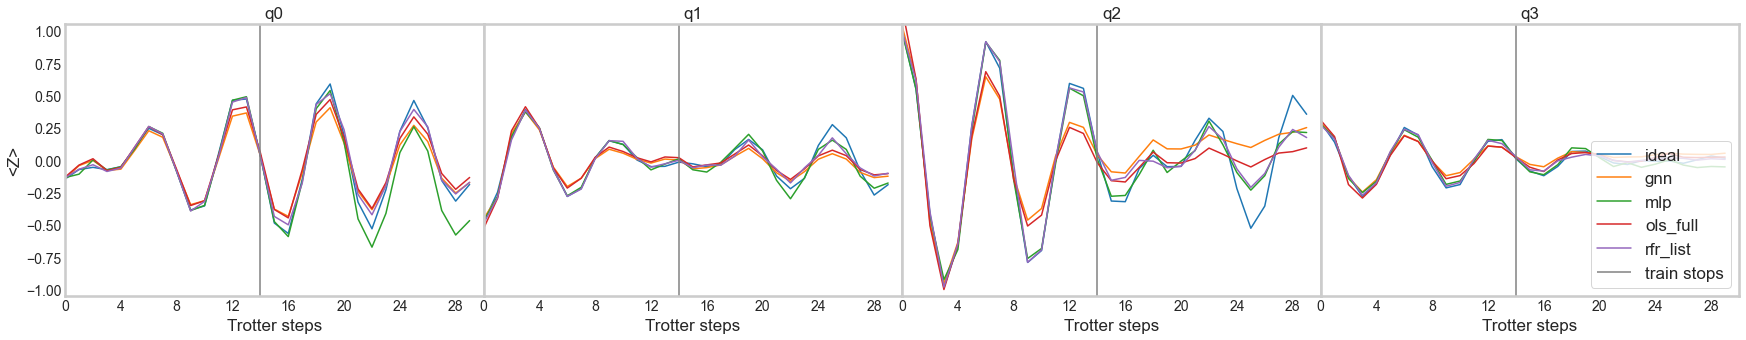

In [17]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 17, 2.5, 2, 0
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(30, 5))
ax = [fig.add_subplot(1,4,i+1) for i in range(4)]
plt.style.use({'figure.facecolor':'white'})

for q in range(4):
    ax[q].plot(-exp_Z_all_ideal[:, q], label='ideal')
    # ax[q].plot(-exp_Z_all_noisy[:, q], label='noisy')
    for key, val in exp_Z_all_mitigated_dict.items():
        if models[key] in [
            'gnn',
            'mlp',
            'ols_full',
            'rfr_list',
            # 'zne'
        ]:
            ax[q].plot(-val[:, q], label=f'{models[key]}')
    ax[q].vlines(x=14, ymin=-2, ymax=2, color='gray', label = 'train stops')
    ax[q].grid(False)

for a in ax[1:]:
    a.set_yticklabels([])
for a in ax:
    a.tick_params(direction="in")
    a.set_ylim([-1.05, 1.05])
    a.set_xlim([0, 30])
    a.set_xlabel('Trotter steps', fontsize=fs)
    a.set_xticks(np.arange(0, 29, 4))
for a in ax:
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(2.6)

for q in range(4):
    ax[q].set_title(f'q{q}', fontsize=fs)
plt.subplots_adjust(wspace=0, hspace=0)
plt.legend(loc='lower right', fontsize=fs)
ax[0].set_ylabel(f'<Z>', fontsize=fs)
plt.show()

# Ising, coherent noise

In [7]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/coherent_single_ising.pk', 'rb') as file:
    loaded = pickle.load(file)

exp_Z_all_ideal = loaded['exp_Z_all_ideal']
exp_Z_all_noisy = loaded['exp_Z_all_noisy']
exp_Z_all_mitigated_dict = loaded['exp_Z_all_mitigated_dict']
models = loaded['models']

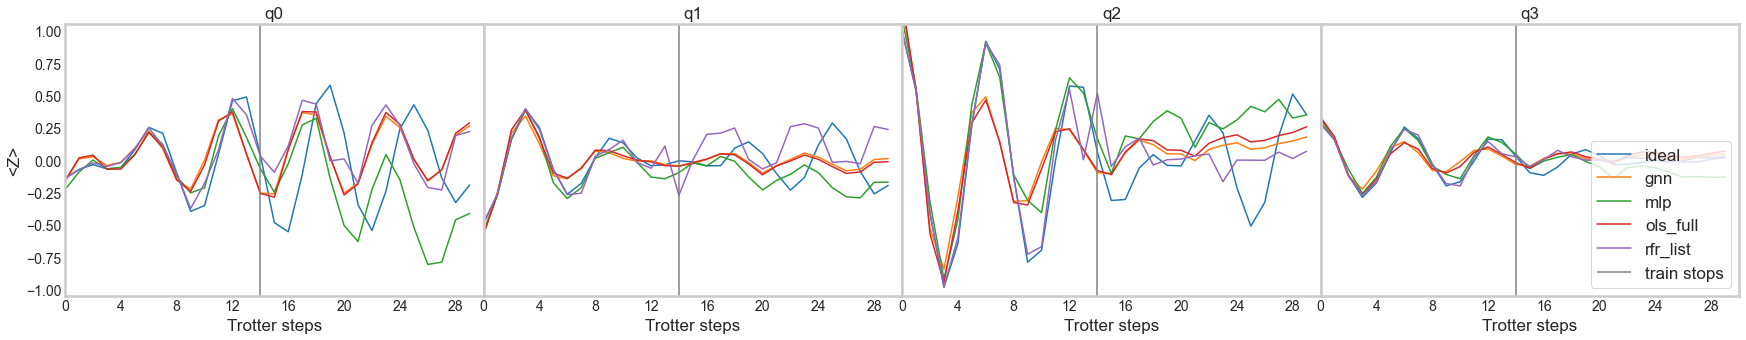

In [10]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 17, 2.5, 2, 0
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(30, 5))
ax = [fig.add_subplot(1,4,i+1) for i in range(4)]
plt.style.use({'figure.facecolor':'white'})

for q in range(4):
    ax[q].plot(-exp_Z_all_ideal[:, q], label='ideal')
    # ax[q].plot(-exp_Z_all_noisy[:, q], label='noisy')
    for key, val in exp_Z_all_mitigated_dict.items():
        if models[key] in [
            'gnn',
            'mlp',
            'ols_full',
            'rfr_list',
            # 'zne'
        ]:
            ax[q].plot(-val[:, q], label=f'{models[key]}')
    ax[q].vlines(x=14, ymin=-2, ymax=2, color='gray', label = 'train stops')
    ax[q].grid(False)

for a in ax[1:]:
    a.set_yticklabels([])
for a in ax:
    a.tick_params(direction="in")
    a.set_ylim([-1.05, 1.05])
    a.set_xlim([0, 30])
    a.set_xlabel('Trotter steps', fontsize=fs)
    a.set_xticks(np.arange(0, 29, 4))
for a in ax:
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(2.6)

for q in range(4):
    ax[q].set_title(f'q{q}', fontsize=fs)
plt.subplots_adjust(wspace=0, hspace=0)
plt.legend(loc='lower right', fontsize=fs)
ax[0].set_ylabel(f'<Z>', fontsize=fs)
plt.show()

# Ising, incoherent noise

In [14]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/incoherent_over_depths.pk', 'rb') as file:
    loaded = pickle.load(file)
df_mean = loaded['df_mean']
df_ste = loaded['df_ste']
df = loaded['df']

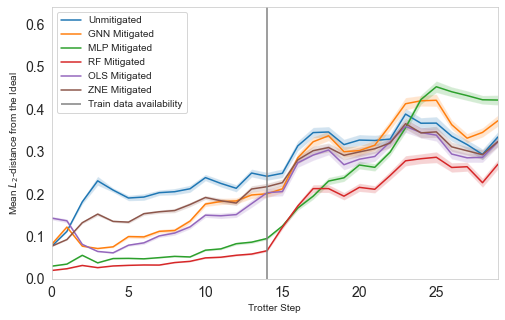

In [15]:
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(8, 5))
steps = sorted(set(df.step))
legend_labels = ['Unmitigated', 'GNN Mitigated', 'MLP Mitigated', 'RF Mitigated', 'OLS Mitigated', 'ZNE Mitigated']
for i, col in enumerate(['L2_noisy', 'L2_gnn', 'L2_mlp', 'L2_rfr_list', 'L2_ols_full', 'L2_zne']):
    plt.plot(steps, df_mean[col], label=legend_labels[i])
    plt.fill_between(x=steps, y1=df_mean[col]-df_ste[col], y2=df_mean[col]+df_ste[col], alpha=0.2)
plt.xlabel('Trotter Step')
plt.ylabel(r'Mean $L_2$-distance from the Ideal')
plt.ylim([0, 0.64])
plt.xlim([0, 29])
plt.vlines(x=14, ymin=0, ymax=1, color='gray', label='Train data availability')
plt.legend()
plt.grid(None)
plt.show()

# Tomography

In [22]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/tomograhy.pk', 'rb') as file:
    loaded = pickle.load(file)
df2 = loaded['df2']

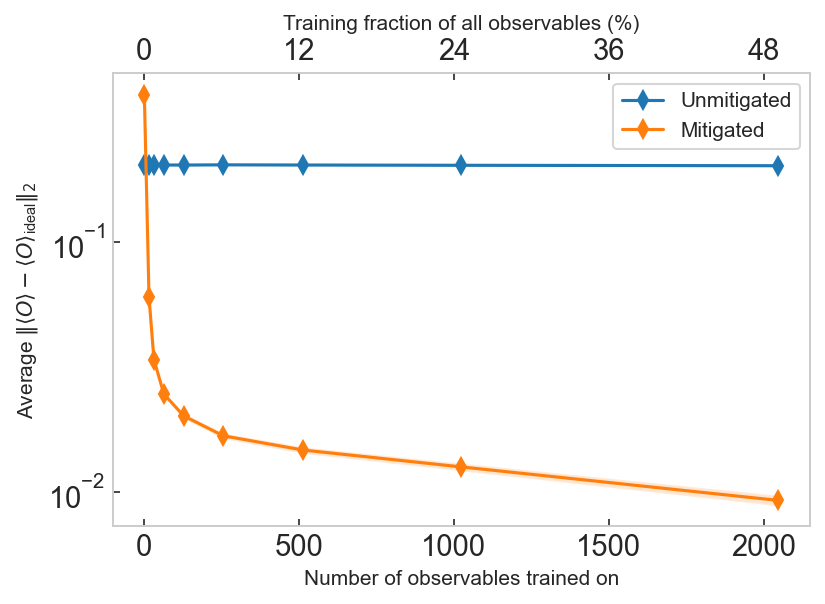

In [23]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

x = df2.index

y = df2['dist_l2_noisy_0']['mean']
ax1.plot(x, y, label='Unmitigated', marker='d')
ax1.fill_between(x,
                 y-df2['dist_l2_noisy_0']['std']/np.sqrt(4**6 - x),
                 y+df2['dist_l2_noisy_0']['std']/np.sqrt(4**6 - x),
                 alpha=0.2)

y = df2['dist_l2_mitigated_0']['mean']
ax1.plot(x, y, label='Mitigated', marker='d')
ax1.fill_between(x,
                 y-df2['dist_l2_mitigated_0']['std']/np.sqrt(4**6 - x), y+df2['dist_l2_mitigated_0']['std']/np.sqrt(4**6 - x),
                 alpha=0.2)

ax1.set_yscale('log')
# plt.xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_navigate(False)
import matplotlib.ticker as mticks
ticks = ax1.get_xticks()
ax2.xaxis.set_major_locator(mticks.FixedLocator(ticks))
percent = [int(x) for x in np.array(ticks)/4**6 * 100]
ax2.set_xticklabels([str(x) for x in percent])
ax2.set_xlabel(r"Training fraction of all observables (%)")

ax1.set_ylabel(r'Average $\|\langle O\rangle-\langle O\rangle _{\mathregular{ideal}} \|_2$')
ax1.set_xlabel('Number of observables trained on')
ax1.legend()

plt.style.use({'figure.facecolor':'white'})
ax1.grid(False)
ax2.grid(False)
for tick in ax1.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
ax1.tick_params(axis='y',direction='in')
ax1.tick_params(axis='x',direction='in')
ax2.tick_params(axis='x',direction='in')
plt.show()

# Mimic ZNE

In [28]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/mimic_zne.pk', 'rb') as file:
    loaded = pickle.load(file)
df_pred = loaded['df_pred']

/var/folders/kj/mfqyg_tj77nf4gt67lvscdkw0000gn/T/ipykernel_95897/1253586572.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pred_mean = df_pred.groupby('steps').agg('mean')
/var/folders/kj/mfqyg_tj77nf4gt67lvscdkw0000gn/T/ipykernel_95897/1253586572.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pred_ste = df_pred.groupby('steps').agg('std') / np.sqrt(len(df_pred[df_pred['steps']==0]))


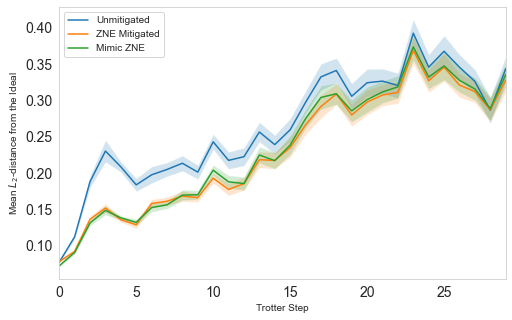

In [30]:
df_pred_mean = df_pred.groupby('steps').agg('mean')
df_pred_ste = df_pred.groupby('steps').agg('std') / np.sqrt(len(df_pred[df_pred['steps']==0]))

plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(8, 5))
steps = sorted(set(df_pred.steps))
legend_labels = ['Unmitigated', 'ZNE Mitigated', 'Mimic ZNE']
for i, col in enumerate(['L2_noisy', 'L2_zne_mitigated', 'L2_tree_pred']):
    plt.plot(steps, df_pred_mean[col], label=legend_labels[i])
    plt.fill_between(x=steps, y1=df_pred_mean[col]-df_pred_ste[col], y2=df_pred_mean[col]+df_pred_ste[col], alpha=0.2)
plt.xlabel('Trotter Step')
plt.ylabel(r'Mean $L_2$-distance from the Ideal')
# plt.ylim([0, 0.64])
plt.xlim([0, 29])
plt.legend()
plt.grid(None)
plt.show()